In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/Admin/Downloads/ICRISAT-District Level Data - ICRISAT-District Level Data.csv")

print(df.head())


   Dist Code  Year  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1  1966          14  Chhattisgarh      Durg                548.0   
1          1  1967          14  Chhattisgarh      Durg                547.0   
2          1  1968          14  Chhattisgarh      Durg                556.3   
3          1  1969          14  Chhattisgarh      Durg                563.4   
4          1  1970          14  Chhattisgarh      Durg                571.6   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                        185.0                  337.59                  44.0   
1                        409.0                  747.71                  50.0   
2                        468.0                  841.27                  53.7   
3                        400.8                  711.40                  49.4   
4                        473.6                  828.55                  44.2   

   WHEAT PRODUCTION (1000 tons)  ...  SUGARC

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [3]:
df.isnull().sum()

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64

In [4]:
df.columns = df.columns.str.strip()

In [5]:
df.dropna(how='all', inplace=True)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.to_csv("cleaned_agri_data.csv", index=False)


In [10]:
!pip install seaborn




Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#Load the cleaned dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("cleaned_agri_data.csv")

# Quick overview
print(df.head())
print(df.info())
print(df.describe())


   Dist Code  Year  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1  1966          14  Chhattisgarh      Durg                548.0   
1          1  1967          14  Chhattisgarh      Durg                547.0   
2          1  1968          14  Chhattisgarh      Durg                556.3   
3          1  1969          14  Chhattisgarh      Durg                563.4   
4          1  1970          14  Chhattisgarh      Durg                571.6   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                        185.0                  337.59                  44.0   
1                        409.0                  747.71                  50.0   
2                        468.0                  841.27                  53.7   
3                        400.8                  711.40                  49.4   
4                        473.6                  828.55                  44.2   

   WHEAT PRODUCTION (1000 tons)  ...  SUGARC

In [ ]:
# Handle missing values (if any left)
# Check for missing values
print(df.isnull().sum())

# Optional: Fill missing numeric values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("cleaned_agri_data.csv")

In [17]:
sns.set(style="whitegrid")

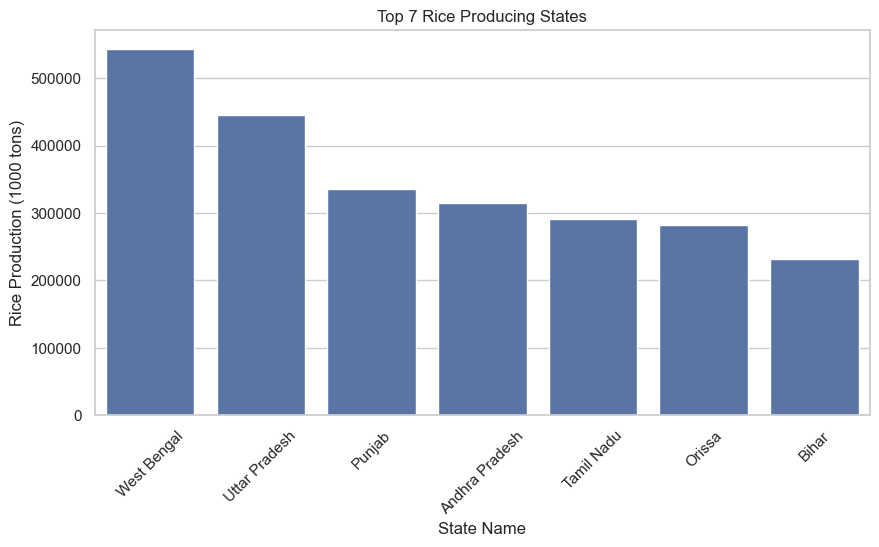

In [18]:
# 1. Top 7 RICE PRODUCTION State Data (Bar Plot)
top7_rice_states = df.groupby("State Name")["RICE PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(7)
plt.figure(figsize=(10,5))
sns.barplot(x=top7_rice_states.index, y=top7_rice_states.values)
plt.title("Top 7 Rice Producing States")
plt.xticks(rotation=45)
plt.ylabel("Rice Production (1000 tons)")
plt.show()

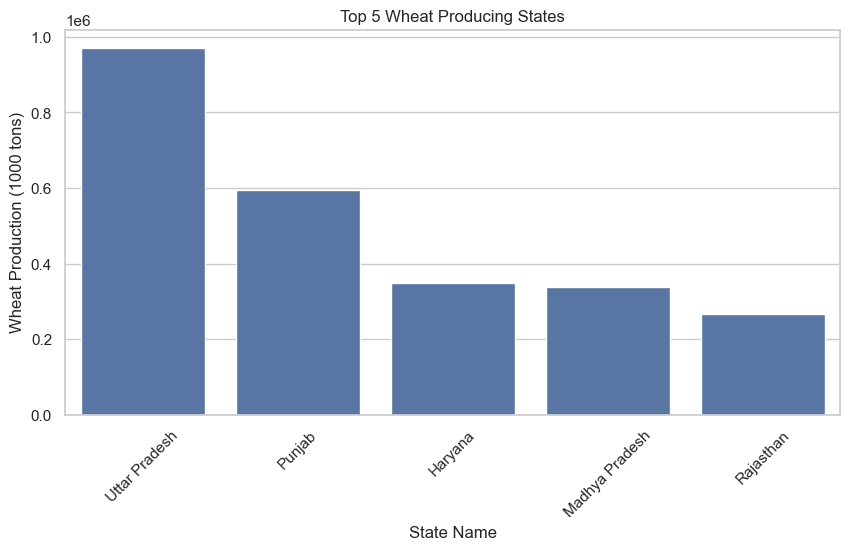

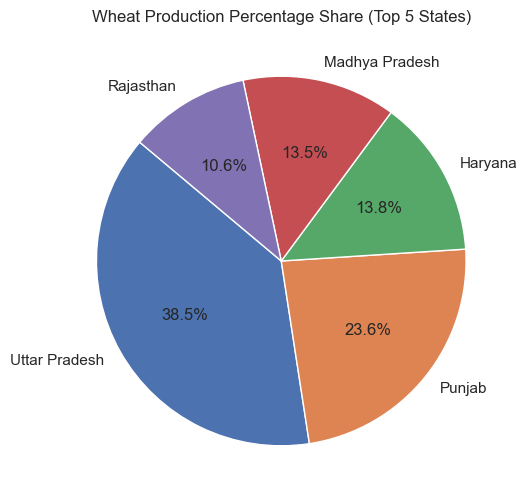

In [19]:
# 2. Top 5 Wheat Producing States Data (Bar Chart) + Percentage (Pie Chart)
top5_wheat_states = df.groupby("State Name")["WHEAT PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(5)

# Bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=top5_wheat_states.index, y=top5_wheat_states.values)
plt.title("Top 5 Wheat Producing States")
plt.ylabel("Wheat Production (1000 tons)")
plt.xticks(rotation=45)
plt.show()

# Pie chart (percentage)
plt.figure(figsize=(6,6))
plt.pie(top5_wheat_states.values, labels=top5_wheat_states.index, autopct='%1.1f%%', startangle=140)
plt.title("Wheat Production Percentage Share (Top 5 States)")
plt.show()

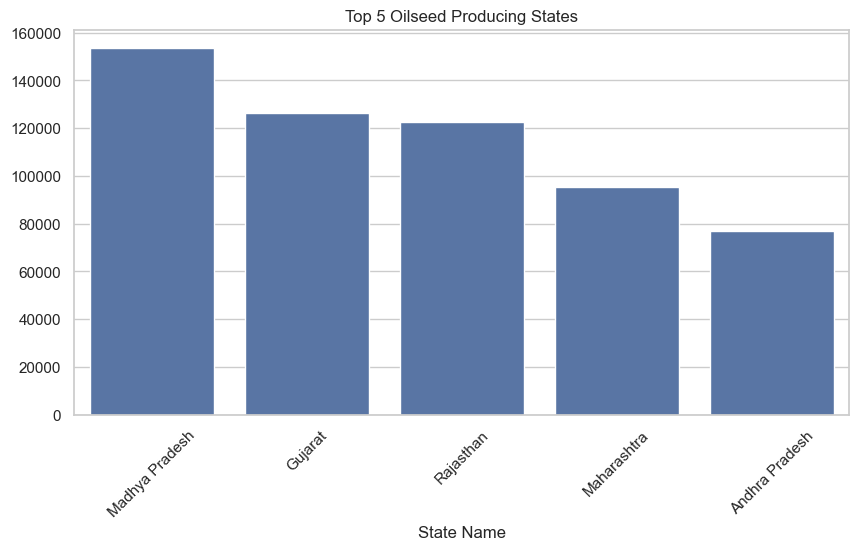

In [20]:
# 3. Oil seed production by top 5 states
top5_oilseed = df.groupby("State Name")["OILSEEDS PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10,5))
sns.barplot(x=top5_oilseed.index, y=top5_oilseed.values)
plt.title("Top 5 Oilseed Producing States")
plt.xticks(rotation=45)
plt.show()

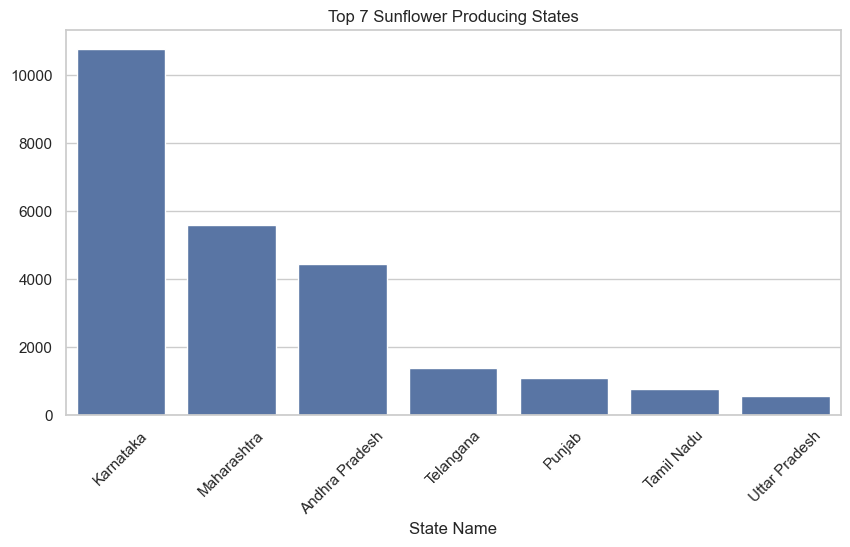

In [21]:
# 4. Top 7 SUNFLOWER PRODUCTION State
top7_sunflower = df.groupby("State Name")["SUNFLOWER PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(7)
plt.figure(figsize=(10,5))
sns.barplot(x=top7_sunflower.index, y=top7_sunflower.values)
plt.title("Top 7 Sunflower Producing States")
plt.xticks(rotation=45)
plt.show()

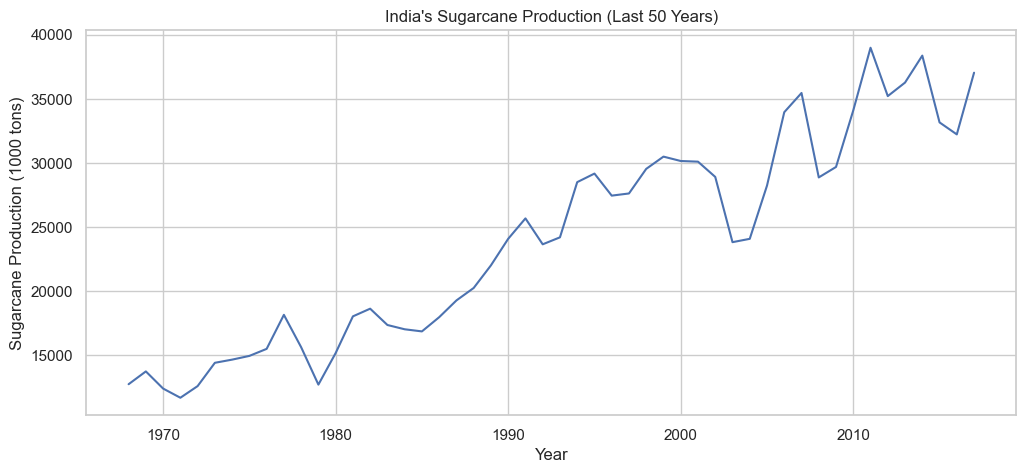

In [22]:
# 5. India's SUGARCANE PRODUCTION From Last 50 Years (Line plot)
sugarcane_last50 = df.groupby("Year")["SUGARCANE PRODUCTION (1000 tons)"].sum().tail(50)
plt.figure(figsize=(12,5))
sns.lineplot(x=sugarcane_last50.index, y=sugarcane_last50.values)
plt.title("India's Sugarcane Production (Last 50 Years)")
plt.ylabel("Sugarcane Production (1000 tons)")
plt.show()

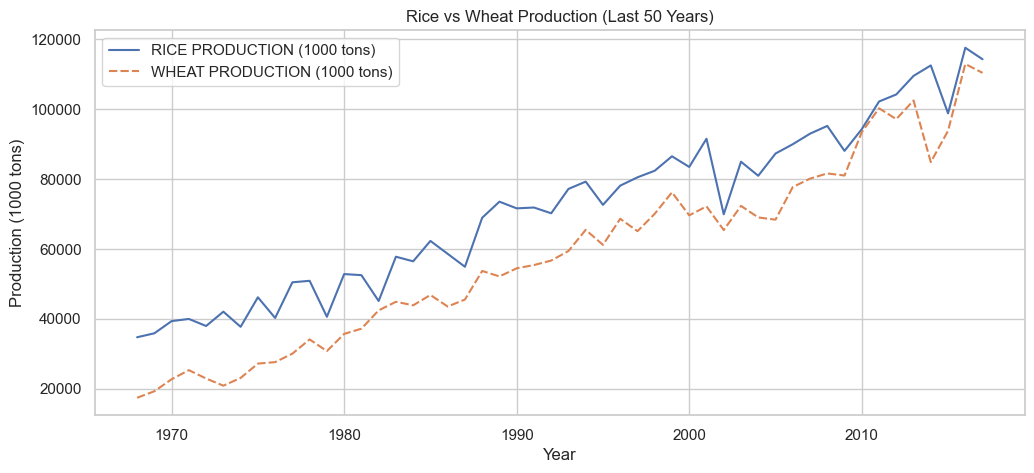

In [23]:
# 6. Rice Production Vs Wheat Production (Last 50 years)
rice_vs_wheat = df.groupby("Year")[["RICE PRODUCTION (1000 tons)", "WHEAT PRODUCTION (1000 tons)"]].sum().tail(50)
plt.figure(figsize=(12,5))
sns.lineplot(data=rice_vs_wheat)
plt.title("Rice vs Wheat Production (Last 50 Years)")
plt.ylabel("Production (1000 tons)")
plt.show()

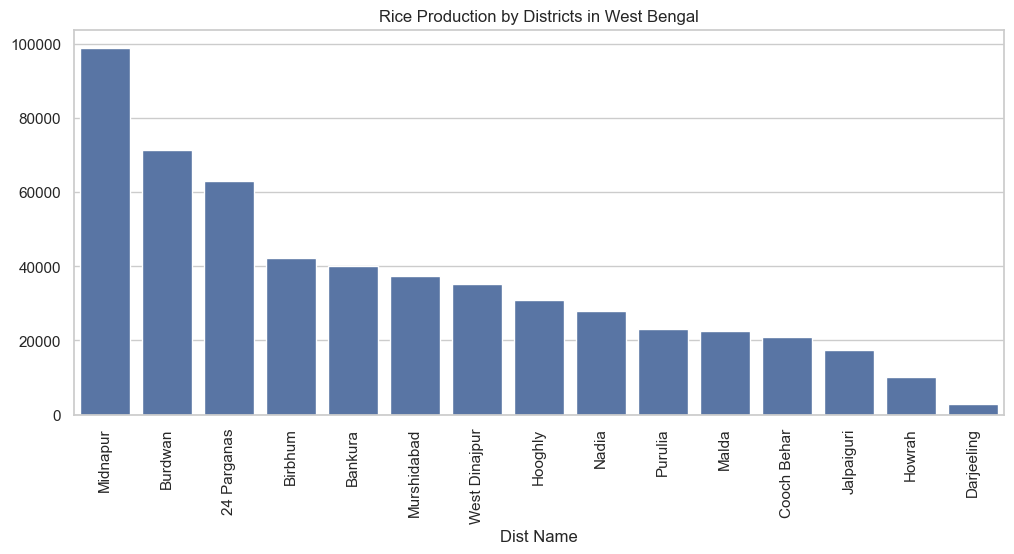

In [24]:
# 7. Rice Production By West Bengal Districts
wb_rice = df[df["State Name"] == "West Bengal"].groupby("Dist Name")["RICE PRODUCTION (1000 tons)"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=wb_rice.index, y=wb_rice.values)
plt.title("Rice Production by Districts in West Bengal")
plt.xticks(rotation=90)
plt.show()


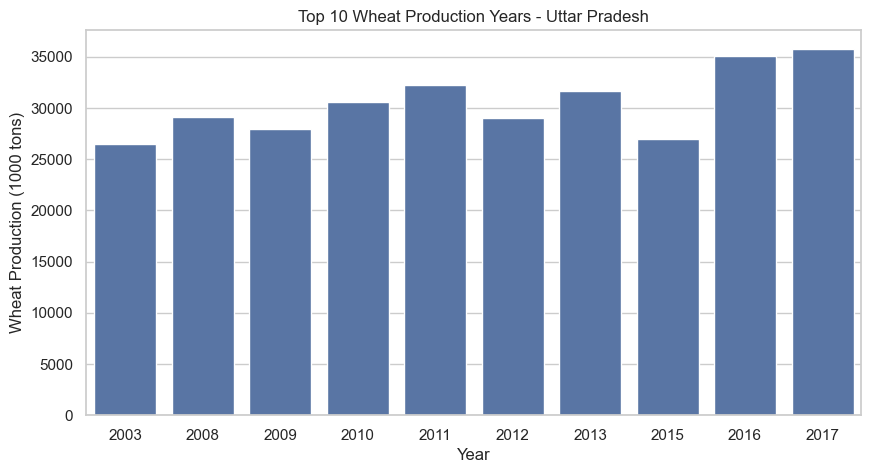

In [25]:
# 8. Top 10 Wheat Production Years From UP
up_wheat_years = df[df["State Name"] == "Uttar Pradesh"].groupby("Year")["WHEAT PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=up_wheat_years.index, y=up_wheat_years.values)
plt.title("Top 10 Wheat Production Years - Uttar Pradesh")
plt.ylabel("Wheat Production (1000 tons)")
plt.show()


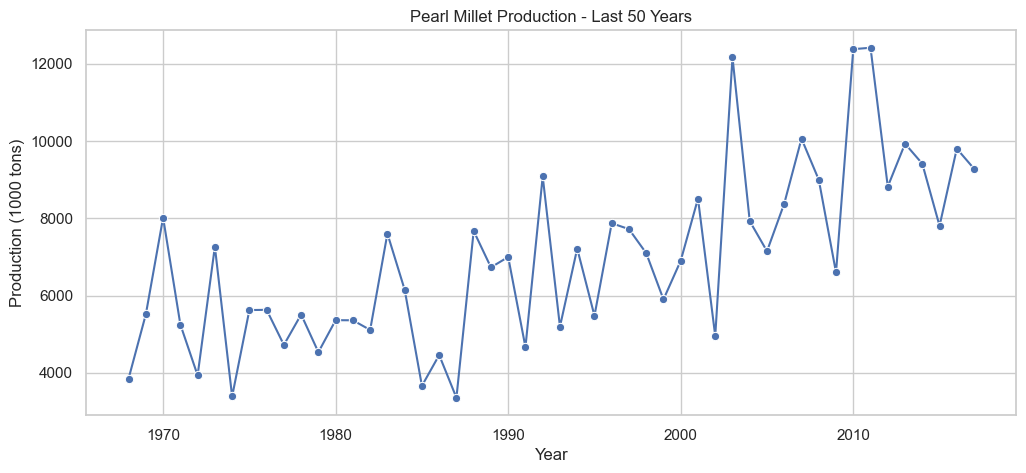

In [35]:
# 9. Millet (Pearl Millet) Production - Last 50 Years
millet_last50 = df.groupby("Year")["PEARL MILLET PRODUCTION (1000 tons)"].sum().tail(50)
plt.figure(figsize=(12,5))
sns.lineplot(x=millet_last50.index, y=millet_last50.values, marker="o")
plt.title("Pearl Millet Production - Last 50 Years")
plt.ylabel("Production (1000 tons)")
plt.xlabel("Year")
plt.show()

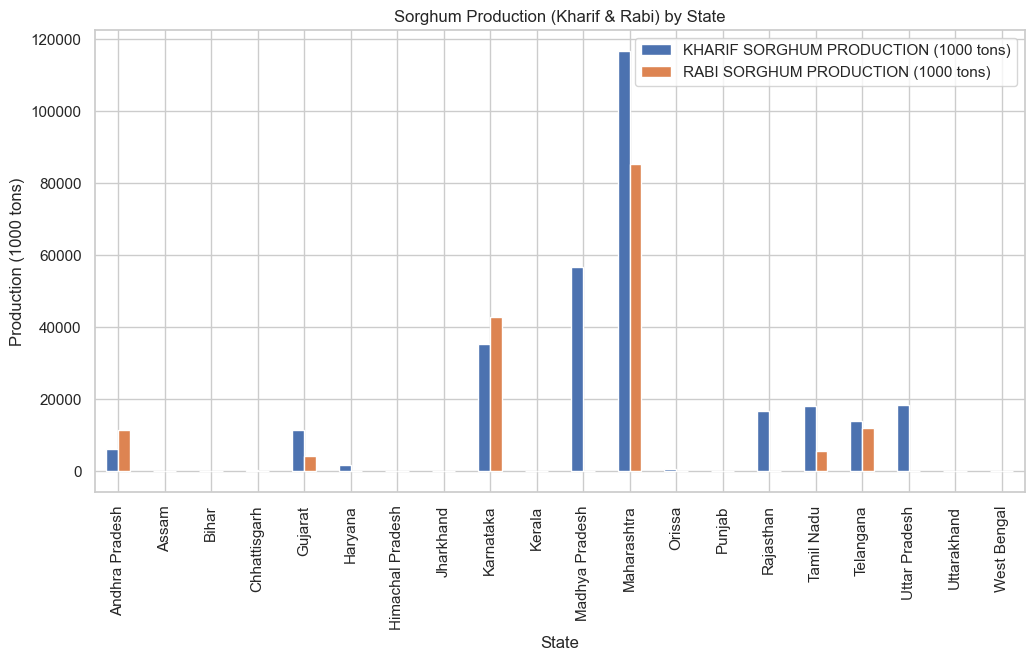

In [36]:
# 10. Sorghum Production (Kharif & Rabi) by Region
sorghum_region = df.groupby("State Name")[["KHARIF SORGHUM PRODUCTION (1000 tons)", 
                                           "RABI SORGHUM PRODUCTION (1000 tons)"]].sum()
sorghum_region.plot(kind="bar", figsize=(12,6))
plt.title("Sorghum Production (Kharif & Rabi) by State")
plt.ylabel("Production (1000 tons)")
plt.xlabel("State")
plt.show()

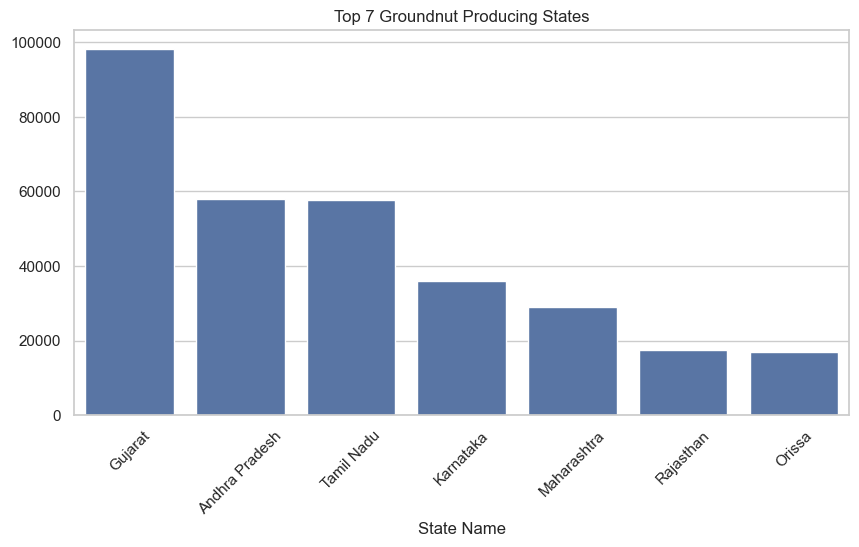

In [29]:
# 11. Top 7 States for Groundnut Production
top7_groundnut = df.groupby("State Name")["GROUNDNUT PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(7)
plt.figure(figsize=(10,5))
sns.barplot(x=top7_groundnut.index, y=top7_groundnut.values)
plt.title("Top 7 Groundnut Producing States")
plt.xticks(rotation=45)
plt.show()

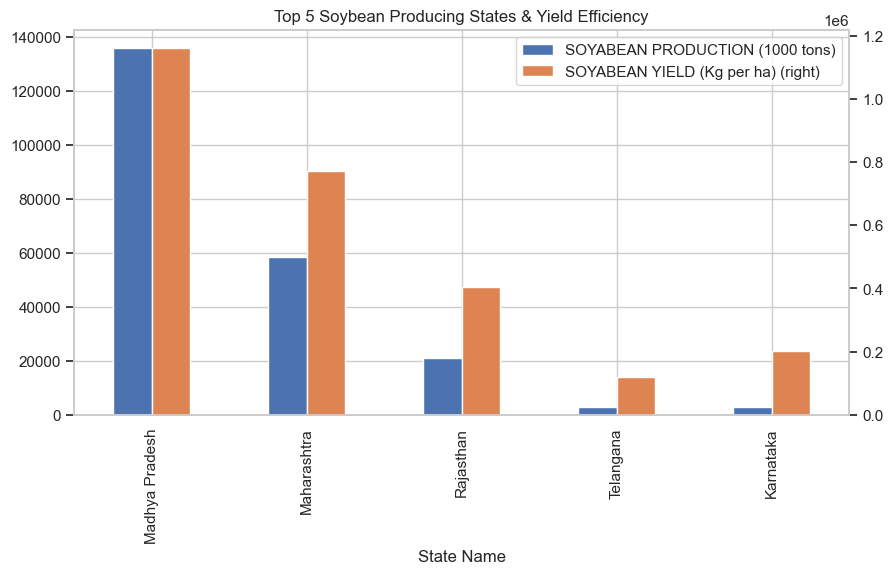

In [30]:
# 12. Soybean Production by Top 5 States and Yield Efficiency
top5_soybean = df.groupby("State Name")[["SOYABEAN PRODUCTION (1000 tons)", "SOYABEAN YIELD (Kg per ha)"]].sum().sort_values(by="SOYABEAN PRODUCTION (1000 tons)", ascending=False).head(5)
top5_soybean.plot(kind="bar", secondary_y="SOYABEAN YIELD (Kg per ha)", figsize=(10,5))
plt.title("Top 5 Soybean Producing States & Yield Efficiency")
plt.show()

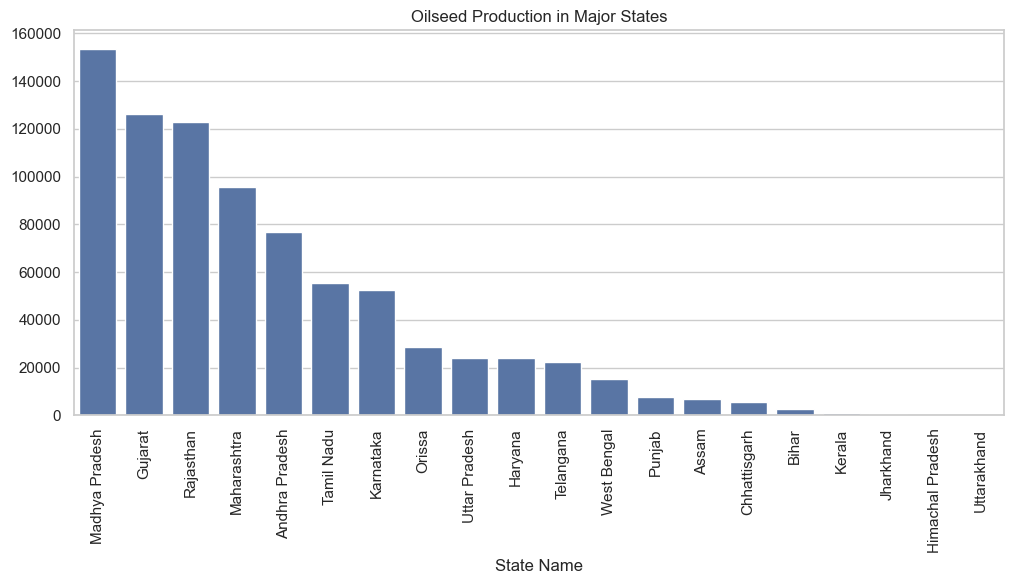

In [31]:
# 13. Oilseed Production in Major States
oilseed_major = df.groupby("State Name")["OILSEEDS PRODUCTION (1000 tons)"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=oilseed_major.index, y=oilseed_major.values)
plt.title("Oilseed Production in Major States")
plt.xticks(rotation=90)
plt.show()

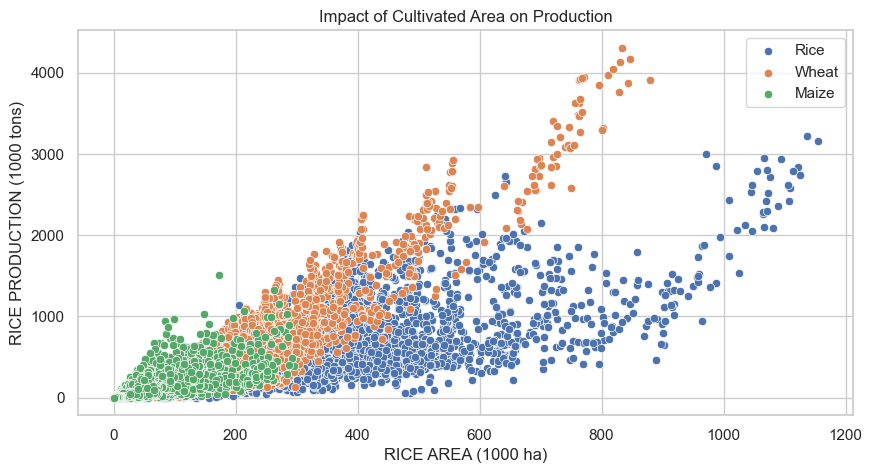

In [32]:
# 14. Impact of Area Cultivated on Production (Rice, Wheat, Maize)
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="RICE AREA (1000 ha)", y="RICE PRODUCTION (1000 tons)", label="Rice")
sns.scatterplot(data=df, x="WHEAT AREA (1000 ha)", y="WHEAT PRODUCTION (1000 tons)", label="Wheat")
sns.scatterplot(data=df, x="MAIZE AREA (1000 ha)", y="MAIZE PRODUCTION (1000 tons)", label="Maize")
plt.title("Impact of Cultivated Area on Production")
plt.legend()
plt.show()

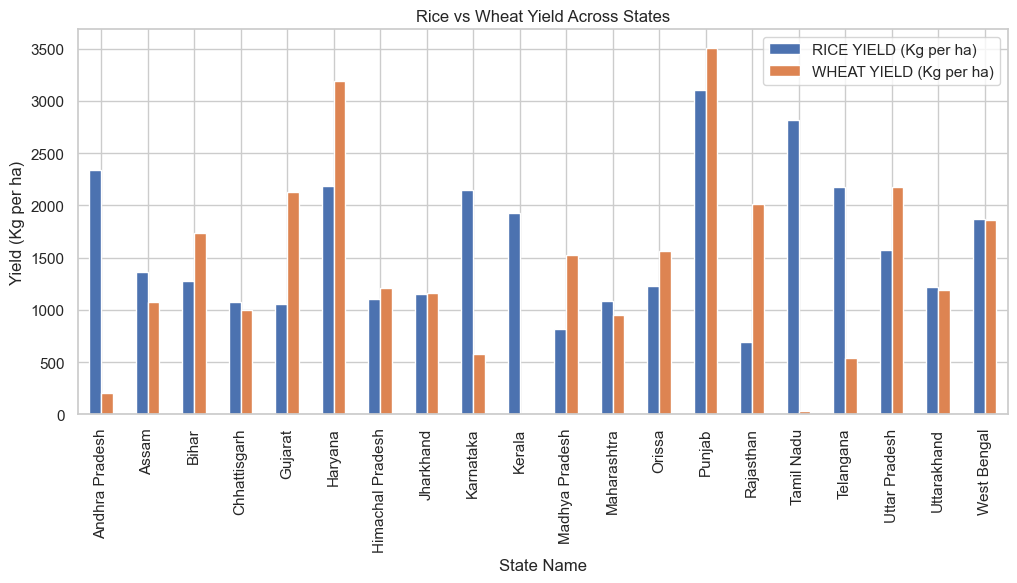

In [33]:
# 15. Rice vs. Wheat Yield Across States
yield_comparison = df.groupby("State Name")[["RICE YIELD (Kg per ha)", "WHEAT YIELD (Kg per ha)"]].mean()
yield_comparison.plot(kind="bar", figsize=(12,5))
plt.title("Rice vs Wheat Yield Across States")
plt.ylabel("Yield (Kg per ha)")
plt.show()

In [37]:
!pip install mysql-connector-python


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import mysql.connector
import pandas as pd

# Load your cleaned data
df = pd.read_csv("cleaned_agri_data.csv")

# Connect to MySQL (XAMPP)
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",  # leave empty if no password is set in XAMPP
    database="agriculture_db"  # Make sure this DB exists
)
cursor = mydb.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS agri_data (
    Dist_Code INT,
    Year INT,
    State_Code INT,
    State_Name VARCHAR(100),
    Dist_Name VARCHAR(100),
    RICE_AREA FLOAT,
    RICE_PRODUCTION FLOAT,
    RICE_YIELD FLOAT,
    WHEAT_AREA FLOAT,
    WHEAT_PRODUCTION FLOAT,
    WHEAT_YIELD FLOAT
    -- Add the rest of your columns here as needed
)
""")

# Insert data
for _, row in df.iterrows():
    cursor.execute("""
    INSERT INTO agri_data (Dist_Code, Year, State_Code, State_Name, Dist_Name, 
    RICE_AREA, RICE_PRODUCTION, RICE_YIELD, WHEAT_AREA, WHEAT_PRODUCTION, WHEAT_YIELD)
    VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
    """, tuple(row[:11]))  # Adjust the slice to match your table columns

mydb.commit()
cursor.close()
mydb.close()

print("Data inserted into MySQL successfully!")


Data inserted into MySQL successfully!


In [41]:
!pip install sqlalchemy pymysql


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.1 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 4.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import pandas as pd
from sqlalchemy import create_engine

# MySQL connection details (update if needed)
username = "root"       # default for XAMPP
password = ""           # leave empty if no password
host = "localhost"      # XAMPP runs locally
database = "agriculture_db"

# Create connection engine
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")

# Read table into Pandas DataFrame
df_mysql = pd.read_sql("SELECT * FROM agri_data", con=engine)

# Show first few rows
print(df_mysql.head())


   Dist_Code  Year  State_Code    State_Name Dist_Name  RICE_AREA  \
0          1  1966          14  Chhattisgarh      Durg      548.0   
1          1  1967          14  Chhattisgarh      Durg      547.0   
2          1  1968          14  Chhattisgarh      Durg      556.3   
3          1  1969          14  Chhattisgarh      Durg      563.4   
4          1  1970          14  Chhattisgarh      Durg      571.6   

   RICE_PRODUCTION  RICE_YIELD  WHEAT_AREA  WHEAT_PRODUCTION  WHEAT_YIELD  
0            185.0      337.59        44.0              20.0       454.55  
1            409.0      747.71        50.0              26.0       520.00  
2            468.0      841.27        53.7              30.0       558.66  
3            400.8      711.40        49.4              26.5       536.44  
4            473.6      828.55        44.2              29.0       656.11  



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dist_Code         16146 non-null  int64  
 1   Year              16146 non-null  int64  
 2   State_Code        16146 non-null  int64  
 3   State_Name        16146 non-null  object 
 4   Dist_Name         16146 non-null  object 
 5   RICE_AREA         16146 non-null  float64
 6   RICE_PRODUCTION   16146 non-null  float64
 7   RICE_YIELD        16146 non-null  float64
 8   WHEAT_AREA        16146 non-null  float64
 9   WHEAT_PRODUCTION  16146 non-null  float64
 10  WHEAT_YIELD       16146 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.4+ MB
None

Missing values per column:
Dist_Code           0
Year                0
State_Code          0
State_Name          0
Dist_Name           0
RICE_AREA           0
RICE_PRODUCTION     0
RICE_YIELD      

C:\Users\Admin\AppData\Local\Temp\ipykernel_22320\3262150713.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_mysql, x="Year", y="RICE_PRODUCTION", ci=None)


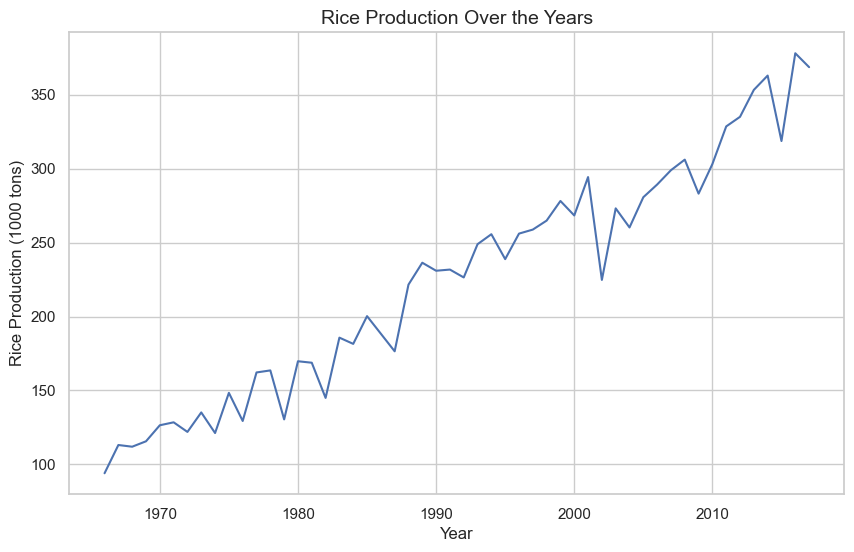

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
print("\nDataset Info:")
print(df_mysql.info())

# Missing values
print("\nMissing values per column:")
print(df_mysql.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df_mysql.describe())

# Example visualization — Rice production over years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mysql, x="Year", y="RICE_PRODUCTION", ci=None)
plt.title("Rice Production Over the Years", fontsize=14)
plt.ylabel("Rice Production (1000 tons)")
plt.xlabel("Year")
plt.grid(True)
plt.show()


In [44]:
# 1. Dataset info
print("\nDataset Info:")
print(df_mysql.info())

# 2. Missing values
print("\nMissing values per column:")
print(df_mysql.isnull().sum())

# 3. Summary statistics
print("\nSummary Statistics:")
print(df_mysql.describe())

# 4. Unique states and districts
print("\nUnique States:", df_mysql['State_Name'].nunique())
print("Unique Districts:", df_mysql['Dist_Name'].nunique())

# 5. Rice production over the years
rice_year = df_mysql.groupby('Year')['RICE_PRODUCTION'].sum()
print("\nRice Production by Year:")
print(rice_year)

# 6. Wheat production over the years
wheat_year = df_mysql.groupby('Year')['WHEAT_PRODUCTION'].sum()
print("\nWheat Production by Year:")
print(wheat_year)

# 7. Top 5 states for rice production
top5_rice_states = df_mysql.groupby('State_Name')['RICE_PRODUCTION'].sum().nlargest(5)
print("\nTop 5 States by Rice Production:")
print(top5_rice_states)

# 8. Top 5 states for wheat production
top5_wheat_states = df_mysql.groupby('State_Name')['WHEAT_PRODUCTION'].sum().nlargest(5)
print("\nTop 5 States by Wheat Production:")
print(top5_wheat_states)

# 9. Average rice yield per state
avg_rice_yield = df_mysql.groupby('State_Name')['RICE_YIELD'].mean()
print("\nAverage Rice Yield per State:")
print(avg_rice_yield)

# 10. Average wheat yield per state
avg_wheat_yield = df_mysql.groupby('State_Name')['WHEAT_YIELD'].mean()
print("\nAverage Wheat Yield per State:")
print(avg_wheat_yield)

# 11. State with highest average rice yield
highest_avg_rice = avg_rice_yield.idxmax()
print("\nState with Highest Avg Rice Yield:", highest_avg_rice)

# 12. State with highest average wheat yield
highest_avg_wheat = avg_wheat_yield.idxmax()
print("State with Highest Avg Wheat Yield:", highest_avg_wheat)

# 13. Year with max total rice production
max_rice_year = rice_year.idxmax()
print("\nYear with Max Rice Production:", max_rice_year)

# 14. Year with max total wheat production
max_wheat_year = wheat_year.idxmax()
print("Year with Max Wheat Production:", max_wheat_year)

# 15. Correlation between rice and wheat yield
correlation = df_mysql[['RICE_YIELD', 'WHEAT_YIELD']].corr()
print("\nCorrelation between Rice and Wheat Yield:")
print(correlation)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dist_Code         16146 non-null  int64  
 1   Year              16146 non-null  int64  
 2   State_Code        16146 non-null  int64  
 3   State_Name        16146 non-null  object 
 4   Dist_Name         16146 non-null  object 
 5   RICE_AREA         16146 non-null  float64
 6   RICE_PRODUCTION   16146 non-null  float64
 7   RICE_YIELD        16146 non-null  float64
 8   WHEAT_AREA        16146 non-null  float64
 9   WHEAT_PRODUCTION  16146 non-null  float64
 10  WHEAT_YIELD       16146 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.4+ MB
None

Missing values per column:
Dist_Code           0
Year                0
State_Code          0
State_Name          0
Dist_Name           0
RICE_AREA           0
RICE_PRODUCTION     0
RICE_YIELD      

In [46]:
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
# Save EDA tables to Excel
with pd.ExcelWriter("EDA_results.xlsx") as writer:
    df_mysql.describe().to_excel(writer, sheet_name="Summary_Statistics")
    df_mysql.isnull().sum().to_excel(writer, sheet_name="Missing_Values")
    rice_year.to_excel(writer, sheet_name="Rice_by_Year")
    wheat_year.to_excel(writer, sheet_name="Wheat_by_Year")
    top5_rice_states.to_excel(writer, sheet_name="Top5_Rice_States")
    top5_wheat_states.to_excel(writer, sheet_name="Top5_Wheat_States")
    avg_rice_yield.to_excel(writer, sheet_name="Avg_Rice_Yield")
    avg_wheat_yield.to_excel(writer, sheet_name="Avg_Wheat_Yield")
    correlation.to_excel(writer, sheet_name="Correlation")


ProgrammingError: 1045 (28000): Access denied for user 'root'@'localhost' (using password: YES)

In [53]:
SHOW DATABASES;
USE agriculture_db; -- or whatever shows up
SHOW TABLES;


SyntaxError: invalid syntax (248397625.py, line 1)

In [54]:
import mysql.connector

# Connect
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password=""  # your password
)

cursor = conn.cursor()

# Show databases
cursor.execute("SHOW DATABASES")
for db in cursor:
    print(db)

# Switch to your DB
cursor.execute("USE agriculture_db")

# Show tables
cursor.execute("SHOW TABLES")
for table in cursor:
    print(table)

cursor.close()
conn.close()


('agriculture_db',)
('information_schema',)
('mysql',)
('performance_schema',)
('phpmyadmin',)
('securecheck',)
('securecheck_db',)
('test',)
('agri_data',)


In [56]:
('production',)
('states',)
...



Ellipsis

In [57]:
query = "SELECT * FROM production"


In [58]:
save_path = r"C:\Users\Admin\Desktop\EDA_results.xlsx"


In [64]:
import pandas as pd

# Example: replace these with your actual DataFrames
# summary_df = ...
# missing_df = ...
# rice_by_year_df = ...
# wheat_by_year_df = ...
# etc.

save_path = r"C:\Users\Admin\Desktop\EDA_results.xlsx"

with pd.ExcelWriter(save_path, engine='xlsxwriter') as writer:
    summary_df.to_excel(writer, sheet_name='Summary_Statistics', index=False)
    missing_df.to_excel(writer, sheet_name='Missing_Values', index=False)
    rice_by_year_df.to_excel(writer, sheet_name='Rice_by_Year', index=False)
    wheat_by_year_df.to_excel(writer, sheet_name='Wheat_by_Year', index=False)
    # add all your other sheets here...

print(f" File saved at: {save_path}")


NameError: name 'summary_df' is not defined

In [63]:
pip install xlsxwriter


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
summary_df = df.describe().reset_index()
missing_df = df.isnull().sum().reset_index(name='missing_count')

rice_by_year_df = df.groupby('Year')['RICE PRODUCTION (1000 tons)'].sum().reset_index()
wheat_by_year_df = df.groupby('Year')['WHEAT PRODUCTION (1000 tons)'].sum().reset_index()


In [66]:
print(df.columns.tolist())


['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name', 'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)', 'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)', 'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)', 'KHARIF SORGHUM AREA (1000 ha)', 'KHARIF SORGHUM PRODUCTION (1000 tons)', 'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)', 'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)', 'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)', 'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)', 'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)', 'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)', 'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)', 'FINGER MILLET PRODUCTION (1000 tons)', 'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)', 'BARLEY PRODUCTION (1000 tons)', 'BARLEY YIELD (Kg per ha)', 'CHICKPEA AREA (1000 ha)', 'CHICKPEA PRODUCTION (1000 tons)', 'CHICKPEA YIELD (Kg per ha)',

In [69]:
import pandas as pd

save_path = r"C:\Users\Admin\Desktop\EDA_results.xlsx"

with pd.ExcelWriter(save_path, engine='xlsxwriter') as writer:
    summary_df.to_excel(writer, sheet_name='Summary_Statistics', index=False)
    missing_df.to_excel(writer, sheet_name='Missing_Values', index=False)
    rice_by_year_df.to_excel(writer, sheet_name='Rice_by_Year', index=False)
    wheat_by_year_df.to_excel(writer, sheet_name='Wheat_by_Year', index=False)

print(f" File saved at: {save_path}")


 File saved at: C:\Users\Admin\Desktop\EDA_results.xlsx


In [70]:
with pd.ExcelWriter(save_path, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    ...


In [73]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\ICRISAT-District Level Data - ICRISAT-District Level Data.csv")

save_path = r"C:\Users\Admin\Desktop\EDA_results.xlsx"

# Step 2: Group by State Name for rice production (Top 7)
top7_rice_states = (
    df.groupby("State Name")["RICE PRODUCTION (1000 tons)"]
    .sum()
    .reset_index()
    .sort_values(by="RICE PRODUCTION (1000 tons)", ascending=False)
    .head(7)
)

with pd.ExcelWriter(save_path, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    top7_rice_states.to_excel(writer, sheet_name="Top7_Rice_States", index=False)

print(" Step 2 saved to Excel")

# Step 3: Group by State Name for wheat production (Top 5 + percentage)
top5_wheat_states = (
    df.groupby("State Name")["WHEAT PRODUCTION (1000 tons)"]
    .sum()
    .reset_index()
    .sort_values(by="WHEAT PRODUCTION (1000 tons)", ascending=False)
    .head(5)
)

total_wheat = top5_wheat_states["WHEAT PRODUCTION (1000 tons)"].sum()
top5_wheat_states["Percentage"] = (
    top5_wheat_states["WHEAT PRODUCTION (1000 tons)"] / total_wheat * 100
)

with pd.ExcelWriter(save_path, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    top5_wheat_states.to_excel(writer, sheet_name="Top5_Wheat_States", index=False)

print(" Step 3 saved to Excel")


 Step 2 saved to Excel
 Step 3 saved to Excel


In [74]:
%pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
# Cell 0 - Setup
import os
import pandas as pd

# Path to your CSV (update if needed)
csv_path = r"C:\Users\Admin\Downloads\ICRISAT-District Level Data - ICRISAT-District Level Data.csv"

# Path to the Excel file we will create/append
save_path = r"C:\Users\Admin\Desktop\EDA_results.xlsx"

# Load dataset (use df_mysql if you already loaded MySQL; otherwise read CSV)
try:
    df  # if df already exists in the notebook
    print("Using existing df in memory.")
except NameError:
    df = pd.read_csv(csv_path)
    print("CSV loaded into df.")

# Helper: find a column by keywords (case-insensitive)
def find_col(df, *keywords):
    keywords_l = [k.lower() for k in keywords]
    for col in df.columns:
        col_l = col.lower()
        if all(k in col_l for k in keywords_l):
            return col
    return None

# Helper to save a dataframe to Excel (append or create)
def save_df_to_excel(df_out, sheet_name):
    mode = 'a' if os.path.exists(save_path) else 'w'
    # if file doesn't exist, pandas will create it. use openpyxl for append.
    with pd.ExcelWriter(save_path, engine='openpyxl', mode=mode, if_sheet_exists='replace') as writer:
        df_out.to_excel(writer, sheet_name=sheet_name, index=False)
    print(f"Saved sheet: {sheet_name}  ({df_out.shape[0]} rows)")

# Quick check of column names (optional)
print("Columns in dataset:\n", df.columns.tolist())


Using existing df in memory.
Columns in dataset:
 ['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name', 'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)', 'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)', 'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)', 'KHARIF SORGHUM AREA (1000 ha)', 'KHARIF SORGHUM PRODUCTION (1000 tons)', 'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)', 'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)', 'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)', 'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)', 'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)', 'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)', 'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)', 'FINGER MILLET PRODUCTION (1000 tons)', 'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)', 'BARLEY PRODUCTION (1000 tons)', 'BARLEY YIELD (Kg per ha)', 'CHICKPEA AREA (1000 ha)', 'CHICKPEA PROD

In [76]:
# 1) Rice production by Year
rice_col = find_col(df, "rice", "production")  # e.g. "RICE PRODUCTION (1000 tons)"
yr_col = find_col(df, "year")  # Year column

rice_by_year = df.groupby(yr_col)[rice_col].sum().reset_index().sort_values(yr_col)
print(rice_by_year.head())
save_df_to_excel(rice_by_year, "Rice_by_Year")


   Year  RICE PRODUCTION (1000 tons)
0  1966                     29133.23
1  1967                     35056.64
2  1968                     34701.52
3  1969                     35836.01
4  1970                     39324.12
Saved sheet: Rice_by_Year  (52 rows)


In [77]:
# 2) Top 7 Rice Producing States
state_col = find_col(df, "state", "name") or find_col(df, "state_name") or find_col(df, "state")
top7_rice_states = df.groupby(state_col)[rice_col].sum().reset_index().sort_values(rice_col, ascending=False).head(7)
print(top7_rice_states)
save_df_to_excel(top7_rice_states, "Top7_Rice_States")


        State Name  RICE PRODUCTION (1000 tons)
19     West Bengal                    544232.26
17   Uttar Pradesh                    445597.62
13          Punjab                    335040.10
0   Andhra Pradesh                    315185.40
15      Tamil Nadu                    291201.51
12          Orissa                    282532.93
2            Bihar                    231759.00
Saved sheet: Top7_Rice_States  (7 rows)


In [78]:
# 3) Top 5 Wheat Producing States + Percentage
wheat_col = find_col(df, "wheat", "production")
top5_wheat_states = df.groupby(state_col)[wheat_col].sum().reset_index().sort_values(wheat_col, ascending=False).head(5)
total_wheat = top5_wheat_states[wheat_col].sum()
top5_wheat_states["Percentage"] = top5_wheat_states[wheat_col] / total_wheat * 100
print(top5_wheat_states)
save_df_to_excel(top5_wheat_states, "Top5_Wheat_States")


        State Name  WHEAT PRODUCTION (1000 tons)  Percentage
17   Uttar Pradesh                     970210.07   38.544331
13          Punjab                     593848.90   23.592322
5          Haryana                     348429.60   13.842348
10  Madhya Pradesh                     338644.25   13.453598
14       Rajasthan                     265994.99   10.567401
Saved sheet: Top5_Wheat_States  (5 rows)


In [79]:
# 4) Top 5 Oilseed producing states
oil_col = find_col(df, "oilseeds", "production") or find_col(df, "oilseed", "production")
top5_oil = df.groupby(state_col)[oil_col].sum().reset_index().sort_values(oil_col, ascending=False).head(5)
print(top5_oil)
save_df_to_excel(top5_oil, "Top5_Oilseed_States")


        State Name  OILSEEDS PRODUCTION (1000 tons)
10  Madhya Pradesh                        153594.79
4          Gujarat                        126224.01
14       Rajasthan                        122726.86
11     Maharashtra                         95567.91
0   Andhra Pradesh                         76888.09
Saved sheet: Top5_Oilseed_States  (5 rows)


In [80]:
# 5) Top 7 Sunflower producing states
sun_col = find_col(df, "sunflower", "production")
top7_sun = df.groupby(state_col)[sun_col].sum().reset_index().sort_values(sun_col, ascending=False).head(7)
print(top7_sun)
save_df_to_excel(top7_sun, "Top7_Sunflower_States")


        State Name  SUNFLOWER PRODUCTION (1000 tons)
8        Karnataka                          10785.87
11     Maharashtra                           5599.46
0   Andhra Pradesh                           4447.78
16       Telangana                           1401.06
13          Punjab                           1081.86
15      Tamil Nadu                            762.38
17   Uttar Pradesh                            552.66
Saved sheet: Top7_Sunflower_States  (7 rows)


In [81]:
# 6) Sugarcane production - last 50 years
sug_col = find_col(df, "sugarcane", "production")
sugarcane_by_year = df.groupby(yr_col)[sug_col].sum().reset_index().sort_values(yr_col).tail(50)
print(sugarcane_by_year.head())
save_df_to_excel(sugarcane_by_year, "Sugarcane_Last50")


   Year  SUGARCANE PRODUCTION (1000 tons)
2  1968                          12720.70
3  1969                          13719.57
4  1970                          12381.60
5  1971                          11664.01
6  1972                          12573.28
Saved sheet: Sugarcane_Last50  (50 rows)


In [ ]:
# 7) Rice vs Wheat production (last 50 years)
rice_wheat_50 = df.groupby(yr_col)[[rice_col, wheat_col]].sum().reset_index().sort_values(yr_col).tail(50)
print(rice_wheat_50.head())
save_df_to_excel(rice_wheat_50, "Rice_vs_Wheat_Last50")
 

   Year  RICE PRODUCTION (1000 tons)  WHEAT PRODUCTION (1000 tons)
2  1968                     34701.52                      17375.67
3  1969                     35836.01                      19232.36
4  1970                     39324.12                      22677.88
5  1971                     39946.79                      25280.89
6  1972                     37925.93                      22879.56
Saved sheet: Rice_vs_Wheat_Last50  (50 rows)


In [83]:
# 8) Rice Production by West Bengal Districts
dist_col = find_col(df, "dist", "name") or find_col(df, "district") or find_col(df, "dist_name")
wb_mask = df[state_col].str.contains("west bengal", case=False, na=False)
wb_rice = df[wb_mask].groupby(dist_col)[rice_col].sum().reset_index().sort_values(rice_col, ascending=False)
print(wb_rice.head(15))
save_df_to_excel(wb_rice, "WB_Rice_by_District")


        Dist Name  RICE PRODUCTION (1000 tons)
10       Midnapur                     98868.28
3         Burdwan                     71422.15
0     24 Parganas                     63011.99
2         Birbhum                     42213.81
1         Bankura                     40165.20
11    Murshidabad                     37261.24
14  West Dinajpur                     35224.87
6         Hooghly                     30962.21
12          Nadia                     28016.30
13        Purulia                     23147.50
9           Malda                     22497.83
4     Cooch Behar                     20949.15
8      Jalpaiguri                     17372.00
7          Howrah                     10264.53
5      Darjeeling                      2855.20
Saved sheet: WB_Rice_by_District  (15 rows)


In [84]:
# 9) Top 10 Wheat Production Years - Uttar Pradesh
up_mask = df[state_col].str.contains("uttar pradesh", case=False, na=False)
up_wheat = df[up_mask].groupby(yr_col)[wheat_col].sum().reset_index().sort_values(wheat_col, ascending=False).head(10)
print(up_wheat)
save_df_to_excel(up_wheat, "UP_Top10_Wheat_Years")


    Year  WHEAT PRODUCTION (1000 tons)
51  2017                      35798.60
50  2016                      35120.90
45  2011                      32271.69
47  2013                      31611.63
44  2010                      30602.91
42  2008                      29110.93
46  2012                      29041.28
43  2009                      27910.80
49  2015                      27010.39
37  2003                      26445.45
Saved sheet: UP_Top10_Wheat_Years  (10 rows)


In [85]:
# 10) Millet production (last 50 years) - sum any millet production columns
millet_cols = [c for c in df.columns if ("millet" in c.lower() and "production" in c.lower())]
if not millet_cols:
    raise ValueError("No millet production column found. Check column names: ", [c for c in df.columns if "millet" in c.lower()])
# sum all millet production columns if several
df["TOTAL_MILLET_PROD"] = df[millet_cols].sum(axis=1)
millet_last50 = df.groupby(yr_col)["TOTAL_MILLET_PROD"].sum().reset_index().sort_values(yr_col).tail(50)
print(millet_last50.head())
save_df_to_excel(millet_last50, "Millet_Last50")


   Year  TOTAL_MILLET_PROD
2  1968            5382.34
3  1969            7176.27
4  1970            9897.48
5  1971            7257.64
6  1972            5631.08
Saved sheet: Millet_Last50  (50 rows)


In [86]:
# 11) Sorghum Kharif & Rabi by State
kharif_col = find_col(df, "kharif", "sorghum", "production")
rabi_col = find_col(df, "rabi", "sorghum", "production")
if kharif_col is None and rabi_col is None:
    # fallback: overall sorghum production column
    s_col = find_col(df, "sorghum", "production")
    sorghum_region = df.groupby(state_col)[s_col].sum().reset_index().sort_values(s_col, ascending=False)
else:
    sorghum_region = df.groupby(state_col)[[c for c in [kharif_col, rabi_col] if c is not None]].sum().reset_index()
print(sorghum_region.head())
save_df_to_excel(sorghum_region, "Sorghum_KR_by_State")


       State Name  KHARIF SORGHUM PRODUCTION (1000 tons)  \
0  Andhra Pradesh                                6195.47   
1           Assam                                   0.00   
2           Bihar                                 125.48   
3    Chhattisgarh                                 464.22   
4         Gujarat                               11373.12   

   RABI SORGHUM PRODUCTION (1000 tons)  
0                              11386.8  
1                                  0.0  
2                                  0.0  
3                                 27.3  
4                               4333.6  
Saved sheet: Sorghum_KR_by_State  (20 rows)


In [87]:
# 12) Top 7 Groundnut producing states
gnd_col = find_col(df, "groundnut", "production")
top7_groundnut = df.groupby(state_col)[gnd_col].sum().reset_index().sort_values(gnd_col, ascending=False).head(7)
print(top7_groundnut)
save_df_to_excel(top7_groundnut, "Top7_Groundnut_States")


        State Name  GROUNDNUT PRODUCTION (1000 tons)
4          Gujarat                          98321.42
0   Andhra Pradesh                          57844.81
15      Tamil Nadu                          57662.42
8        Karnataka                          36033.05
11     Maharashtra                          29002.06
14       Rajasthan                          17354.29
12          Orissa                          16857.48
Saved sheet: Top7_Groundnut_States  (7 rows)


In [88]:
# 13) Soybean: top 5 by production + yield (efficiency)
soy_prod_col = find_col(df, "soy", "production") or find_col(df, "soyabean", "production") or find_col(df, "soyabean", "production")
soy_yield_col = find_col(df, "soy", "yield") or find_col(df, "soyabean", "yield") or find_col(df, "soya", "yield")
top5_soy = df.groupby(state_col)[[soy_prod_col, soy_yield_col]].sum().reset_index().sort_values(soy_prod_col, ascending=False).head(5)
print(top5_soy)
save_df_to_excel(top5_soy, "Top5_Soybean_Yield")


        State Name  SOYABEAN PRODUCTION (1000 tons)  \
10  Madhya Pradesh                        136006.52   
11     Maharashtra                         58643.93   
14       Rajasthan                         21174.99   
16       Telangana                          3022.13   
8        Karnataka                          2873.98   

    SOYABEAN YIELD (Kg per ha)  
10                  1161169.25  
11                   770938.60  
14                   404598.94  
16                   119230.77  
8                    201773.29  
Saved sheet: Top5_Soybean_Yield  (5 rows)


In [89]:
# 14) Oilseed production in major states (full)
oil_by_state = df.groupby(state_col)[oil_col].sum().reset_index().sort_values(oil_col, ascending=False)
print(oil_by_state.head(10))
save_df_to_excel(oil_by_state, "Oilseed_by_State")


        State Name  OILSEEDS PRODUCTION (1000 tons)
10  Madhya Pradesh                        153594.79
4          Gujarat                        126224.01
14       Rajasthan                        122726.86
11     Maharashtra                         95567.91
0   Andhra Pradesh                         76888.09
15      Tamil Nadu                         55275.03
8        Karnataka                         52599.04
12          Orissa                         28453.77
17   Uttar Pradesh                         24015.98
5          Haryana                         24006.60
Saved sheet: Oilseed_by_State  (20 rows)


In [90]:
# 15) Impact of area on production (create a sheet ready for scatter visuals)
rice_area_col = find_col(df, "rice", "area")
wheat_area_col = find_col(df, "wheat", "area")
maize_area_col = find_col(df, "maize", "area")
maize_prod_col = find_col(df, "maize", "production")

area_prod = df.groupby([yr_col, state_col]).agg({
    rice_area_col: "sum",
    rice_col: "sum",
    wheat_area_col: "sum",
    wheat_col: "sum",
    maize_area_col: "sum",
    maize_prod_col: "sum"
}).reset_index()

# rename for readability
area_prod = area_prod.rename(columns={
    rice_area_col: "RICE_AREA",
    rice_col: "RICE_PROD",
    wheat_area_col: "WHEAT_AREA",
    wheat_col: "WHEAT_PROD",
    maize_area_col: "MAIZE_AREA",
    maize_prod_col: "MAIZE_PROD"
})
print(area_prod.head())
save_df_to_excel(area_prod, "Area_vs_Production")


   Year      State Name  RICE_AREA  RICE_PROD  WHEAT_AREA  WHEAT_PROD  \
0  1966  Andhra Pradesh    2401.00    3214.00        2.50        0.60   
1  1966           Assam    1851.82    1632.44        5.30        3.49   
2  1966           Bihar    2915.46     946.67      801.76      362.84   
3  1966    Chhattisgarh    2911.00    1532.00       73.00       34.00   
4  1966         Gujarat     510.00     301.30      433.80      459.30   

   MAIZE_AREA  MAIZE_PROD  
0        9.00        7.10  
1        8.52        4.21  
2      689.62      775.87  
3       79.00      103.00  
4      262.90      176.10  
Saved sheet: Area_vs_Production  (1038 rows)


In [91]:
# 16) Rice vs Wheat yield (avg) by state
rice_yield_col = find_col(df, "rice", "yield")
wheat_yield_col = find_col(df, "wheat", "yield")
yield_comp = df.groupby(state_col)[[rice_yield_col, wheat_yield_col]].mean().reset_index().sort_values(rice_yield_col, ascending=False)
yield_comp = yield_comp.rename(columns={rice_yield_col: "RICE_YIELD_AVG", wheat_yield_col: "WHEAT_YIELD_AVG"})
print(yield_comp.head())
save_df_to_excel(yield_comp, "Rice_Wheat_Yield_by_State")


        State Name  RICE_YIELD_AVG  WHEAT_YIELD_AVG
13          Punjab     3100.420350      3509.008986
15      Tamil Nadu     2813.897420        29.745593
0   Andhra Pradesh     2337.551014       204.469738
5          Haryana     2188.078434      3189.977885
16       Telangana     2179.698547       536.485128
Saved sheet: Rice_Wheat_Yield_by_State  (20 rows)


In [92]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Admin\Downloads\ICRISAT-District Level Data - ICRISAT-District Level Data.csv")
print(df.columns.tolist())


['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name', 'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)', 'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)', 'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)', 'KHARIF SORGHUM AREA (1000 ha)', 'KHARIF SORGHUM PRODUCTION (1000 tons)', 'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)', 'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)', 'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)', 'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)', 'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)', 'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)', 'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)', 'FINGER MILLET PRODUCTION (1000 tons)', 'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)', 'BARLEY PRODUCTION (1000 tons)', 'BARLEY YIELD (Kg per ha)', 'CHICKPEA AREA (1000 ha)', 'CHICKPEA PRODUCTION (1000 tons)', 'CHICKPEA YIELD (Kg per ha)',

In [93]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\ICRISAT-District Level Data - ICRISAT-District Level Data.csv")

# Save path for Excel
save_path = r"C:\Users\Admin\Desktop\EDA_results.xlsx"

# Step 1 – Rice production by year
rice_by_year = df.groupby("Year")["RICE PRODUCTION (1000 tons)"].sum().reset_index()

# Step 2 – Top 7 rice-producing states overall
top7_rice_states = (
    df.groupby("State Name")["RICE PRODUCTION (1000 tons)"]
    .sum()
    .sort_values(ascending=False)
    .head(7)
    .reset_index()
)

# Step 3 – Top 5 wheat-producing states overall
top5_wheat_states = (
    df.groupby("State Name")["WHEAT PRODUCTION (1000 tons)"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

# Step 4 – Top 5 oilseed-producing states overall
top5_oilseed_states = (
    df.groupby("State Name")["OILSEEDS PRODUCTION (1000 tons)"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

# Step 5 – Top 7 sunflower-producing states overall
top7_sunflower_states = (
    df.groupby("State Name")["SUNFLOWER PRODUCTION (1000 tons)"]
    .sum()
    .sort_values(ascending=False)
    .head(7)
    .reset_index()
)

# Step 6 – Sugarcane production last 50 years
sugarcane_last50 = (
    df[df["Year"] >= (df["Year"].max() - 50)]
    .groupby("Year")["SUGARCANE PRODUCTION (1000 tons)"]
    .sum()
    .reset_index()
)

# Step 7 – Rice vs Wheat production last 50 years
rice_wheat_last50 = (
    df[df["Year"] >= (df["Year"].max() - 50)]
    .groupby("Year")[["RICE PRODUCTION (1000 tons)", "WHEAT PRODUCTION (1000 tons)"]]
    .sum()
    .reset_index()
)

# Step 8 – West Bengal rice production by district
wb_rice_by_district = (
    df[df["State Name"] == "West Bengal"]
    .groupby("Dist Name")["RICE PRODUCTION (1000 tons)"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Step 9 – UP top 10 wheat-producing years
up_top10_wheat_years = (
    df[df["State Name"] == "Uttar Pradesh"]
    .groupby("Year")["WHEAT PRODUCTION (1000 tons)"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Step 10 – Pearl millet production last 50 years
millet_last50 = (
    df[df["Year"] >= (df["Year"].max() - 50)]
    .groupby("Year")["PEARL MILLET PRODUCTION (1000 tons)"]
    .sum()
    .reset_index()
)

# Step 11 – Sorghum kharif production by state
sorghum_kr_by_state = (
    df.groupby("State Name")["KHARIF SORGHUM PRODUCTION (1000 tons)"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Step 12 – Top 7 groundnut-producing states
top7_groundnut_states = (
    df.groupby("State Name")["GROUNDNUT PRODUCTION (1000 tons)"]
    .sum()
    .sort_values(ascending=False)
    .head(7)
    .reset_index()
)

# Step 13 – Top 5 soybean yield states
top5_soybean_yield = (
    df.groupby("State Name")["SOYABEAN YIELD (Kg per ha)"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

# Step 14 – Oilseed production by state
oilseed_by_state = (
    df.groupby("State Name")["OILSEEDS PRODUCTION (1000 tons)"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Step 15 – Rice & wheat yield by state
rice_wheat_yield_by_state = (
    df.groupby("State Name")[["RICE YIELD (Kg per ha)", "WHEAT YIELD (Kg per ha)"]]
    .mean()
    .reset_index()
)

# Save all results into one Excel file
with pd.ExcelWriter(save_path, engine="openpyxl", mode="w") as writer:
    rice_by_year.to_excel(writer, sheet_name="Rice_by_Year", index=False)
    top7_rice_states.to_excel(writer, sheet_name="Top7_Rice_States", index=False)
    top5_wheat_states.to_excel(writer, sheet_name="Top5_Wheat_States", index=False)
    top5_oilseed_states.to_excel(writer, sheet_name="Top5_Oilseed_States", index=False)
    top7_sunflower_states.to_excel(writer, sheet_name="Top7_Sunflower_States", index=False)
    sugarcane_last50.to_excel(writer, sheet_name="Sugarcane_Last50", index=False)
    rice_wheat_last50.to_excel(writer, sheet_name="Rice_vs_Wheat_Last50", index=False)
    wb_rice_by_district.to_excel(writer, sheet_name="WB_Rice_by_District", index=False)
    up_top10_wheat_years.to_excel(writer, sheet_name="UP_Top10_Wheat_Years", index=False)
    millet_last50.to_excel(writer, sheet_name="Millet_Last50", index=False)
    sorghum_kr_by_state.to_excel(writer, sheet_name="Sorghum_KR_by_State", index=False)
    top7_groundnut_states.to_excel(writer, sheet_name="Top7_Groundnut_States", index=False)
    top5_soybean_yield.to_excel(writer, sheet_name="Top5_Soybean_Yield", index=False)
    oilseed_by_state.to_excel(writer, sheet_name="Oilseed_by_State", index=False)
    rice_wheat_yield_by_state.to_excel(writer, sheet_name="Rice_Wheat_Yield_by_State", index=False)

print(f" All 15 queries saved to {save_path}")


 All 15 queries saved to C:\Users\Admin\Desktop\EDA_results.xlsx


KeyError: 'Dist_Name'